### Diffusion Equation (1D) using Devito

$$
\begin{equation}
  \frac{du}{dt} = D \frac{d^2u}{dx^2}   x\in(0,L), t\in(0,T]
\end{equation}
$$

Example

Initial concentration:
\begin{equation}
u(x,0) = \frac{1}{\sigma \sqrt{2 \pi}} \exp(- \frac{(x-x_{mean})^2}{\sigma ^2})
\end{equation}

Dirichlet Bondary Condition:
\begin{equation}
u_e(0,t) = u_e(L,t) = 0
\end{equation}



In [1]:
import numpy as np
def initial_concent(x, x_mean=0.5, sigma=0.2):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp((x-x_mean)**2/-(sigma**2))

In [2]:
L = 1
dx = 0.01
x = np.arange(0, L, dx)
u0 = initial_concent(x)

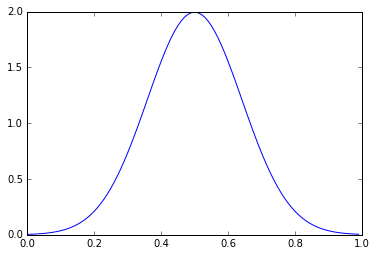

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,u0,'b')

Discretization
\begin{equation}
\frac{u_i^{n+1} - u_i^n}{\delta t} = D \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\delta x^2} 
\end{equation}


$$
\begin{equation}
u_i^{n+1} = u_i^n  + C  (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
\end{equation}
$$

\begin{equation}
C = D \frac{\delta t}{\delta x^2}
\end{equation}

In [4]:
a=0.5
spacing = 0.01
dx2, dy2 = spacing**2, spacing**2
dt = dx2 * dy2 / (2 * a * (dx2 + dy2))

In [7]:
from devito import TimeData, Operator
from sympy import Eq, solve
from sympy.abc import h, s

D = 1.0
Nx = len(x)
dt = 0.00001
Nt = 500

#initial condition
u0 = initial_concent(x)

# Allocate the grid and set initial condition
# Note: This should be made simpler through the use of defaults
u = TimeData(name='u', shape=(Nx, ), time_order=1, space_order=2)
u.data[0, :] = u0[:]

In [8]:
# Derive the stencil according to devito conventions
eqn = Eq(u.dt, D * u.dx2)
stencil = solve(eqn, u.forward)[0]
op = Operator(Eq(u.forward, stencil), subs={h: dx, s: dt})

# Execute the generated Devito stencil operator
op.apply(u, t=Nt)

DSE: <filter object at 0x1134f3e80> [flops: 5, elapsed: 0.00] >>
     <filter object at 0x1134f3e80> [flops: 5, elapsed: 0.00] >>
     <filter object at 0x1134f3e80> [flops: 5, elapsed: 0.00] >>
     <filter object at 0x1134f3e80> [flops: 4, elapsed: 0.00] >>
     <filter object at 0x1134f3e80> [flops: 4, elapsed: 0.00]
     [Total elapsed: 0.01 s]
DLE: <filter object at 0x10bac4be0> [elapsed: 0.00] >>
     <filter object at 0x10bac4be0> [elapsed: 0.00] >>
     <filter object at 0x10bac4be0> [elapsed: 0.00] >>
     <filter object at 0x10bac4be0> [elapsed: 0.00] >>
     <filter object at 0x10bac4be0> [elapsed: 0.00] >>
     <filter object at 0x10bac4ba8> [elapsed: 0.01]
     [Total elapsed: 0.02 s]
FAILED compiler invocation: gcc -O3 -g -march=native -fPIC -Wall -std=c99 -shared /var/folders/f3/c2wg4lkx1ms7_41c3qzz8x7nrdhbjw/T/devito-1893215804/4f11714d30cfbcce766e0133a317c806b4628203.c -o /var/folders/f3/c2wg4lkx1ms7_41c3qzz8x7nrdhbjw/T/devito-1893215804/4f11714d30cfbcce766e0133a317c80

CompileError: module compilation failed

In [9]:
Nt = 1000
u2 = TimeData(name='u2', shape=(Nx, ), time_order=1, space_order=2)
u2.data[0, :] = u0[:]
op.apply(u2,t=Nt)

FAILED compiler invocation: gcc -O3 -g -march=native -fPIC -Wall -std=c99 -shared /var/folders/f3/c2wg4lkx1ms7_41c3qzz8x7nrdhbjw/T/devito-1893215804/4f11714d30cfbcce766e0133a317c806b4628203.c -o /var/folders/f3/c2wg4lkx1ms7_41c3qzz8x7nrdhbjw/T/devito-1893215804/4f11714d30cfbcce766e0133a317c806b4628203.dylib


CompileError: module compilation failed

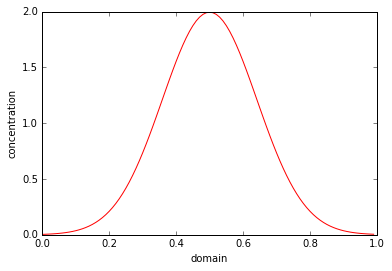

In [10]:
plt.plot(x,u0, '-r')
plt.plot(x,u.data[1,:], 'g')
plt.plot(x,u2.data[1,:], 'b')
plt.xlabel('domain')
plt.ylabel('concentration')